<a href="https://colab.research.google.com/github/edaaydinea/machine-learning/blob/master/Smiling%20Faces%20Detector%20Using%20CNN/%20Smiling_Faces_Detector_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Smiling Faces Detector Using CNN**
### **Via SuperDataScience Team**

**PROBLEM STATEMENT: SMILE DETECTOR**

Target class
* 0: Not smiling
* 1: Smiling


---


* The dataset contains a series of images that can be used to solve the Happy House problem!

* We need to build an artificial neural network that can detect smiling faces. Only smiling people will be allowed to enter the house!

**PROBLEM STATEMENT: MACHINE LEARNING TERMS**

* Smile detector dataset contains 64x64 coloured image with values ranging from 0-255. 

* '0' represents black and '255' represents white.
* Happy dataset consists of 750 images 
  * 600 training
  * 150 testing
* Images are 64x64 pixels (colored)
* Data Source : https://www.kaggle.com/iarunava/happy-house-dataset

**PROBLEM STATEMENT: (REVIEW) WHAT IS AN IMAGE?**

* A grayscale image is system of 256 tone with values ranging from 0-255.
* '0' represents black and '255' represents white.
* Numbers in-between represents greys between black and white.
* Binary systems use digits '0' and '1' where '00000000' for black, to '11111111' for white (8-bit image).
* **Note:** binary value of '11111111' is equal to decimal value of '255'.

**CONVOLUTIONAL NEURAL NETWORK: ARTIFICIAL NEURAL NETWORKS BASICS**

* Artficial neural networks are kind of models that are used mainly to mimic the human brain. 

* How the human brain works ans these try to mimic the human brain in a mathematical format. And that's the power of artificial neural networks.

* The neuron collects signals from input channels **dendrites** , processes information in its **nucleus**, and then generates an output in a long thin branch called the **axon**.
 
 *How the humans learns?*
  * Human learning occurs adaptively by varying the bond strength between these neurons.

  *How could we build that artificial neural network to build efficient network?*
  * We're going to actually connect a bunch of these neurones together. We're going to take let's say like thousands of them. We can organize them obviously to input layer to hidden layer. These neurones one takes all the inputs coming from previously layer does kind of specific processing and generates an output. That's how we process information. 

**CONVOLUTIONAL NEURAL NETWORK: FEATURE DETECTOR**

* Convolutions use a kernel matrix to scan a given image and apply a filter obtain a certain effect. 
  * That filter goes the picture and scan the entire image and apply specific kind of a feature detect detection algorithm to extract information out of this image. 
  * What happens once we apply these feature detectors we apply one quality feature maps.
    * Feature maps are different  variations of this image so this image is kind of divided into certain like series of images.
    * **Feature detectors = Kernels**
* An image Kernel is a matrix used to apply effects such as blurring and sharpening.
* Kernels are used in machine learning for **feature extraction** to select most important pixels of an image. 
* Convolution preserves the **spatial relationship** between pixels.

**nx(Feature detector(3x3)) + image(3X3) = nx(feature map(3x3))**

n = number of feature detector | number of feature map 


Live Convolution: http://setosa.io/ev/image-kernels/

**CONVOLUTIONAL NEURAL NETWORK: RELU**

* RELU Layers are used to add non-linearity in the feature map.
* RELU is that if any value is below zero it will set it to zero. So if any value is a negative, it will be zero and afterwards if it's positive, we're just going to pass along the exact same values.
* f(y) = y (45 degrees straight line) ( just for positive values)
* f(y) = 0 For negative values, f(y) is going to kill these all values. ( make it to zero) 
   * **Why do we do this? What is the advantage of this? What is the point of this?**
   * Our feature becomes more scattered. You have instead of defined values ,within the features we have let's say   7,10, -5, -6 etc. was kind of like a very high kind of variations.
* It also enhances the **sparsity** or how **scattered** the feature map is. 
* The gradient of the RELU  does not vanish as we increase x compared to the sigmoid function. 

**CONVOLUTIONAL NEURAL NETWORK: MAXPOOLING / FLATTENING**

* In the maxpooling, we select highest pixel in the 2x2 pixels. 
* Pooling or down sampling layers are placed after convolutional layers to **reduce feature map dimensionality.**
* This improves the **computational efficiency** while preserving the features.
* Pooling helps the model to **generalize by avoiding overfitting**. If one of the pizel is shifted, the pooled feature map will still be the same.
* Max pooling works by retaining the **maximum feature response** within a given sample size in a feature map. 

* When we did the flattening process after maxplooling, it will be ready to take this flattened layer and feed it to the neaural network.And that's pretty much how can you run or how can you build your convolutional neural network.
* Live illustration: https://cs.ryerson.ca/~aharley/vis/conv/flat.html


**CONVOLUTIONAL NEURAL NETWORK: INCREASE FILTERS/DROPOUT**

* Improve accuracy by adding more feature detectors/ filters or adding a dropout.
* Dropout refers to dropping out units in a neural network.
* Neurons develop co-dependency amongs each other during training.
* Dropout is a regularization technique for reducing overfitting in neural networks.
* It enables training to occur on several architectures of the neural network.

* Dropout which is can be used to improves generalization capability of the network, which is how they will be able to generalize and actually perform on a testing data better even though it hasn't seen this data before or during training.
* By doing droput, we drop the selected neurone and all the areas connected to it. 
  * *What is the advantage of this?*
    * It can help tp reduce overfitting of the network.
    * It gets back even more the stronger and try to avoid what we call the overfitting problem.

**STEP 2: IMPORTING DATA**

In [0]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import h5py #Import h5py for read our specific images which is stored in binary format 
import random # Import random for random number generation

Reading train_happy.h5 file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train_happy.h5 to train_happy.h5


In [0]:
happy_training = h5py.File('train_happy.h5', "r")

Reading test_happy.h5 file

In [4]:
from google.colab import files
uploaded = files.upload()

Saving test_happy.h5 to test_happy.h5


In [0]:
happy_testing = h5py.File('test_happy.h5', "r")

In [6]:
for key in happy_training.keys():
  print(key)


list_classes
train_set_x
train_set_y


In [0]:
x_train = np.array(happy_training["train_set_x"][:])
y_train = np.array(happy_training["train_set_y"][:])

In [0]:
x_test = np.array(happy_testing["test_set_x"][:])
y_test = np.array(happy_testing["test_set_y"][:])

In [9]:
x_train

array([[[[178, 190, 163],
         [172, 181, 173],
         [188, 196, 184],
         ...,
         [255, 255, 254],
         [254, 255, 250],
         [249, 253, 222]],

        [[184, 201, 165],
         [149, 154, 142],
         [149, 158, 139],
         ...,
         [255, 255, 253],
         [254, 255, 250],
         [251, 255, 230]],

        [[198, 207, 165],
         [141, 147, 128],
         [168, 184, 154],
         ...,
         [253, 255, 244],
         [254, 255, 248],
         [253, 255, 233]],

        ...,

        [[ 77,  82,  89],
         [ 60,  64,  68],
         [ 49,  53,  55],
         ...,
         [ 31,  32,  30],
         [ 47,  48,  46],
         [ 75,  75,  75]],

        [[ 68,  71,  76],
         [ 55,  58,  59],
         [ 44,  47,  47],
         ...,
         [ 30,  31,  29],
         [ 40,  41,  39],
         [ 63,  64,  63]],

        [[ 61,  64,  66],
         [ 52,  54,  54],
         [ 45,  47,  46],
         ...,
         [ 30,  31,  29],
        

These are basically a bunch of images. We represent any image. It's simply bunch of pixels has values from 0 to 255. These are the values of the pixels. That's out all images here. 

In [10]:
x_train.shape

(600, 64, 64, 3)

That's format of each specific image. 
* We have 64 by 64 which has dimensions of the pixels. 
* It's coloured image and it's not a greyscale image. We would find the column image actually consists of three layers.
* 14 dimensional array in a way where 600 indicates the number of images we have. 

In [11]:
y_train

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

0 indicates no smiling. 1 indicates smiling.

In [12]:
y_train.shape

(600,)

It is output layer. It has only 600 values from a training perspective.

**STEP 3: VISUALIZATION OF THE DATASET**

In [0]:
i = random.randint(1,600)

Selecting random pixels

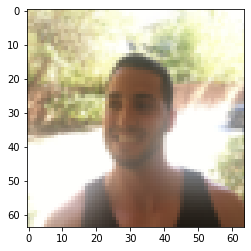

In [14]:
plt.imshow(x_train[i])

Checking it's smiling or not. 

In [15]:
print(y_train[i])

1


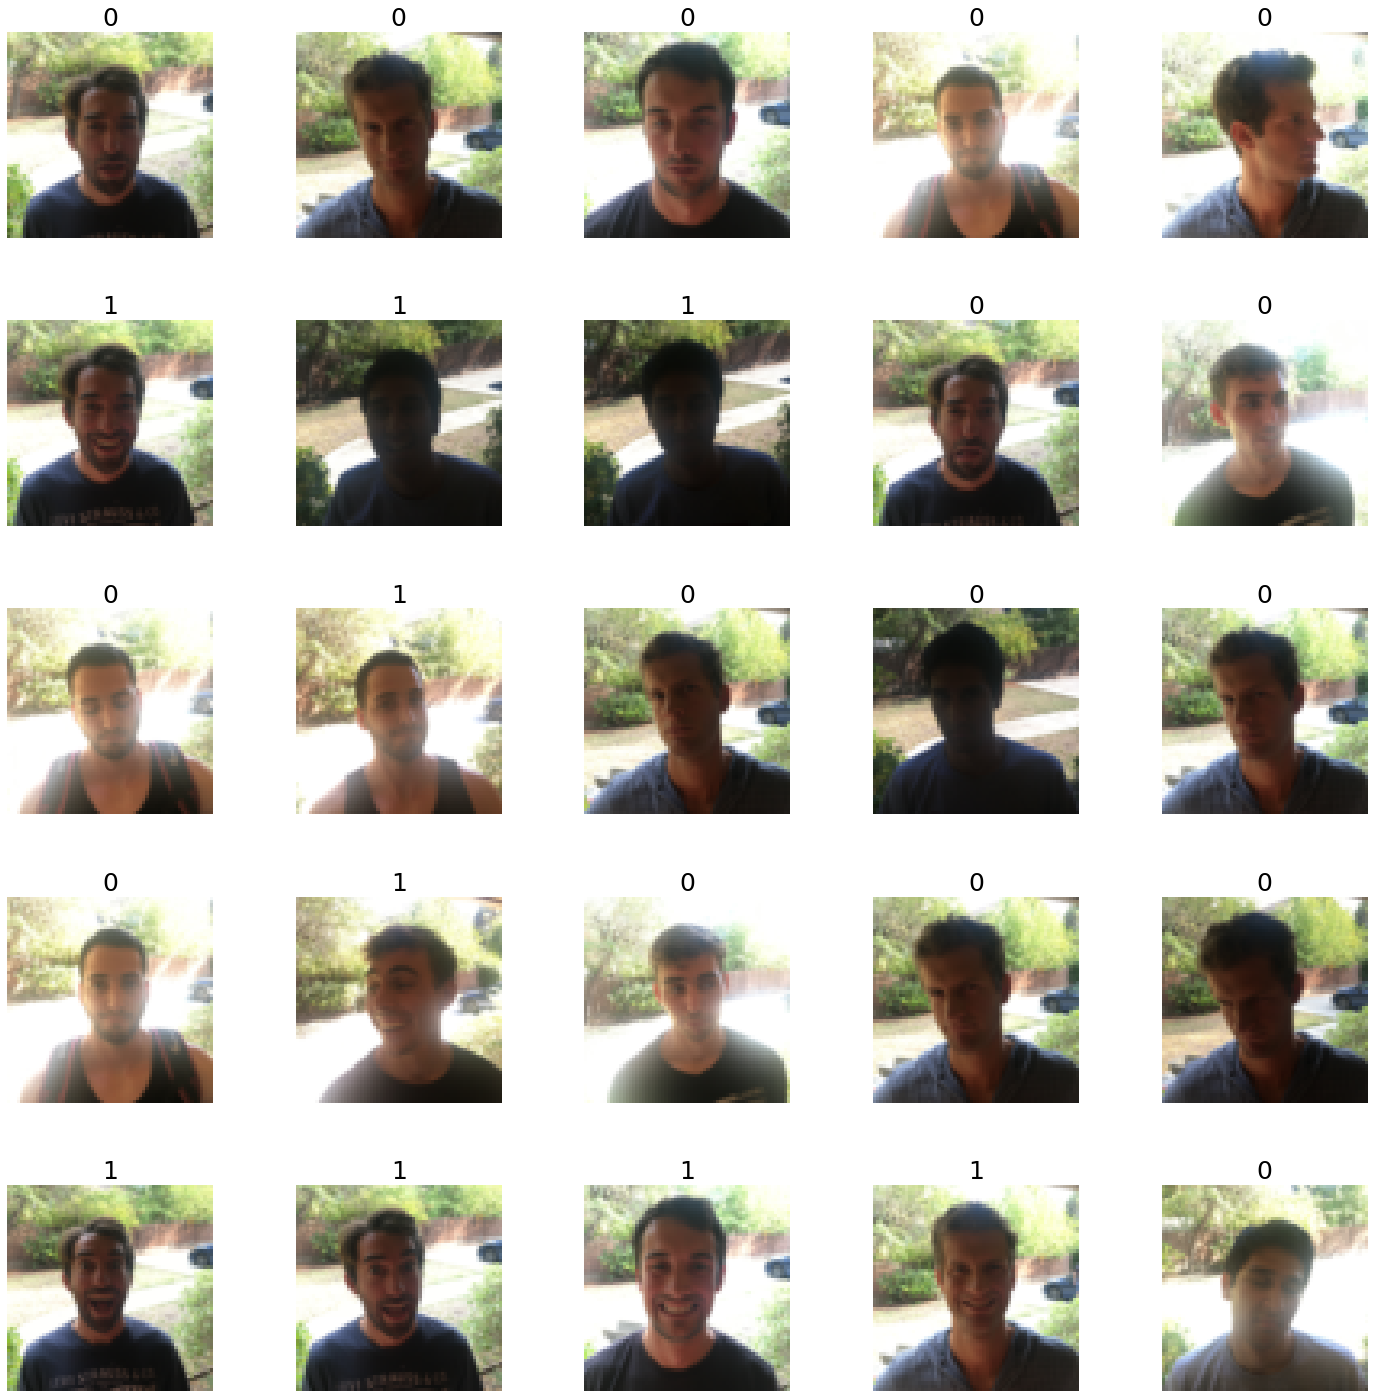

In [16]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
w_grid = 5
l_grid = 5

# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(l_grid, w_grid, figsize = (25,25))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, w_grid * l_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( x_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off')

# vertical direction
plt.subplots_adjust(hspace=0.4)


**STEP 4: TRAINING THE MODEL**

Change the values to range from zero to one that would be make it much easier for the network and improve our accuracy

In [0]:
# Data normalization
x_train = x_train/ 255
x_test = x_test/ 255

In [18]:
x_train

array([[[[0.69803922, 0.74509804, 0.63921569],
         [0.6745098 , 0.70980392, 0.67843137],
         [0.7372549 , 0.76862745, 0.72156863],
         ...,
         [1.        , 1.        , 0.99607843],
         [0.99607843, 1.        , 0.98039216],
         [0.97647059, 0.99215686, 0.87058824]],

        [[0.72156863, 0.78823529, 0.64705882],
         [0.58431373, 0.60392157, 0.55686275],
         [0.58431373, 0.61960784, 0.54509804],
         ...,
         [1.        , 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98039216],
         [0.98431373, 1.        , 0.90196078]],

        [[0.77647059, 0.81176471, 0.64705882],
         [0.55294118, 0.57647059, 0.50196078],
         [0.65882353, 0.72156863, 0.60392157],
         ...,
         [0.99215686, 1.        , 0.95686275],
         [0.99607843, 1.        , 0.97254902],
         [0.99215686, 1.        , 0.91372549]],

        ...,

        [[0.30196078, 0.32156863, 0.34901961],
         [0.23529412, 0.25098039, 0.26666667]

In [19]:
x_test

array([[[[0.8745098 , 0.81176471, 0.62352941],
         [0.85098039, 0.81568627, 0.61176471],
         [0.87058824, 0.85098039, 0.6627451 ],
         ...,
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686]],

        [[0.85490196, 0.8       , 0.60392157],
         [0.84313725, 0.79215686, 0.64705882],
         [0.85490196, 0.82352941, 0.6745098 ],
         ...,
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686]],

        [[0.79215686, 0.74117647, 0.57254902],
         [0.81176471, 0.76078431, 0.59607843],
         [0.88627451, 0.85490196, 0.7372549 ],
         ...,
         [0.99607843, 1.        , 0.98431373],
         [0.99215686, 0.99607843, 0.97647059],
         [1.        , 1.        , 0.99215686]],

        ...,

        [[0.89019608, 0.90196078, 0.76862745],
         [0.97254902, 0.97647059, 0.91372549]

Show the images

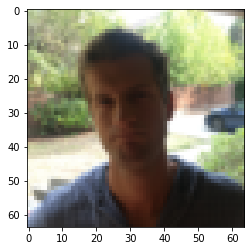

In [20]:
plt.imshow(x_train[10])

In [21]:
x_train.shape

(600, 64, 64, 3)

In [22]:
y_train.shape

(600,)

Tensorflow part - using tensorflow backend

In [0]:
# Import train_test_split from scikit library
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

**from keras.models import Sequential**
* We would going to start building our convolutional neural network from the left hand side to the right hand side in a sequential fashion. 

**from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout**

* Build convolutional neural network
* Build input layer, using feature detectors
* max pooling, dropout, flatten
* fully connected layer


**from keras.optimizers import Adam**
* perform our training 



In [41]:
cnn_model = Sequential()

# Adding different layers to our network
# FIRST LAYER
cnn_model.add(Conv2D(64, 6, 6, input_shape= (64, 64, 3), activation= 'relu'))
# All hidden layers in the relu

# MAX POOLING LAYER
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# DROPOUT  RANDOMLY
cnn_model.add(Dropout(0.2))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (6, 6), input_shape=(64, 64, 3..., activation="relu")`
  """


In [42]:
# Another convolutional layer and another max pooling layer
cnn_model.add(Conv2D(64, 5, 5, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu")`
  """Entry point for launching an IPython kernel.


In [43]:
cnn_model.add(Flatten())

# fully connected layer ( with hidden layer)
cnn_model.add(Dense(output_dim = 128, activation = 'relu'))
cnn_model.add(Dense(output_dim = 1, activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
cnn_model.compile(loss ='binary_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


* We choose the binary crossentropy, because we have 0 and 1 binary output.
* lr = learning rate ( it's basically how fast the network are going to stop learning)



In [45]:
epochs = 5

history = cnn_model.fit(x_train, y_train, batch_size = 30, nb_epoch = epochs, verbose = 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until





Epoch 1/5





600/600 [==============================] - 9s 15ms/step - loss: 0.7565 - acc: 0.5250
Epoch 2/5
600/600 [==============================] - 8s 13ms/step - loss: 0.6841 - acc: 0.5817
Epoch 3/5
600/600 [==============================] - 8s 13ms/step - loss: 0.6216 - acc: 0.6267
Epoch 4/5
600/600 [==============================] - 8s 13ms/step - loss: 0.5213 - acc: 0.7383
Epoch 5/5
600/600 [==============================] - 8s 13ms/step - loss: 0.4146 - acc: 0.8000


* epoch that mean how many times we're going to update out weights.
* batch_size that mean how many images would get to be fed. 
* nb = number of ...
* verbose that mean how much details we're going to show actually performing the training.

**STEP 5: EVALUATING THE MODEL**

In [61]:
evaluation = cnn_model.evaluate(x_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

150/150 [==============================] - 0s 3ms/step
Test Accuracy : 0.820


In [0]:
# get the predictions for the test data
predicted_class = cnn_model.predict_classes(x_test)

In [64]:
predicted_class.shape

(150, 1)

In [65]:
y_test.shape

(150,)

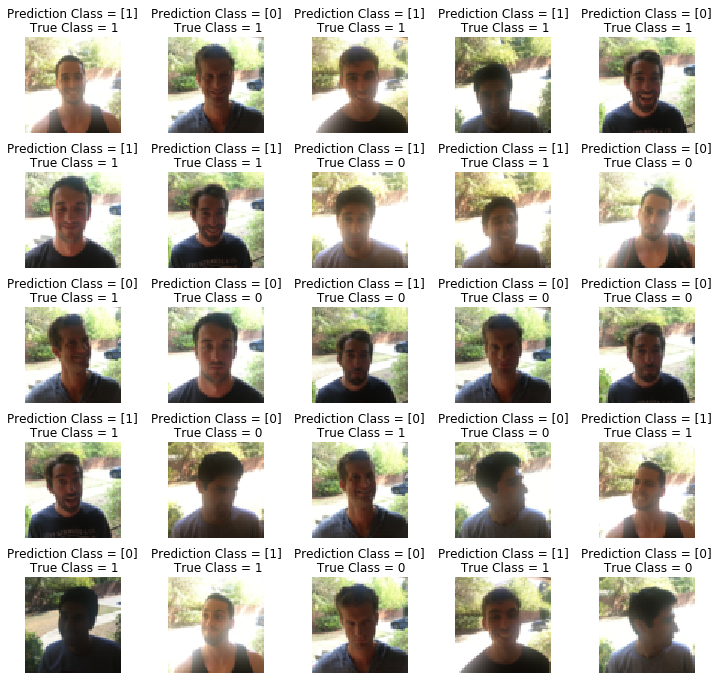

In [73]:
l = 5
w = 5

fig, axes = plt.subplots(l, w, figsize= (12,12))
axes = axes.ravel()

for i in np.arange(0,l*w ):
  axes[i].imshow(x_test[i])
  axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)



We're going to use what we call confusion matrix to indicate how many samples that have been correctly classified and how many samples that have been misclassified.

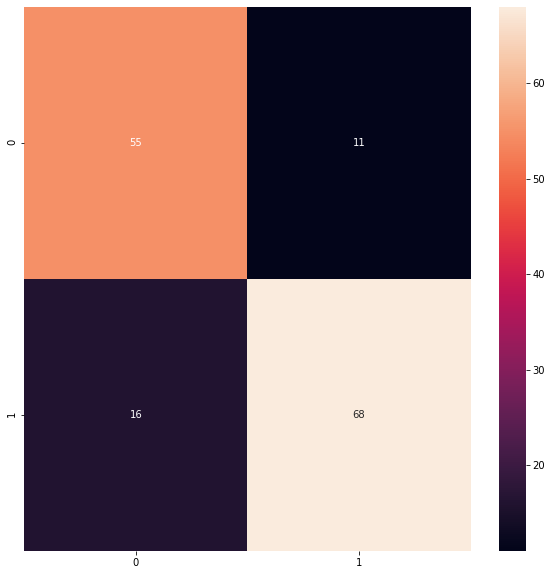

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_class)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

Row are predicted classes. 
 * 0 and 1
    * Our prediction is 0 and real result is 0. 55 samples are here. **(not smiling)**
    * Our prediction is 0 and real result is 1. 11 samples are here.
    * Our prediction is 1 and real result is 1. 68 samples are here. **(smiling)**
    * Our prediction is 1 and real answer is 0. 16 samples are here.



In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test.T, predicted_class))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        66
           1       0.86      0.81      0.83        84

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150

